# Flow Data Visualization

The data set is a snapshot of water flowing through a channel. Winds acting upon the (open) surface of the water create turbulences inside the water. Movements of water particles (caused by winds) were calculated by students in the first supercomputing class by Prof. Lloyd Fosdick, University of Colorado, 1992. File “field2.irreg” contains data describing the particle movement in a 2d slide perpendicular to the length of the channel. Data is given for a regular 82x82 grid in the following format: starting position (x,y,z) and relative movement (u,v,w).

In [38]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as pat
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
%matplotlib inline

In [39]:
data = pd.read_csv('E:/Workspace/Python/Python_Practise/field2.irreg.txt', sep=" " , header=None , skiprows= 6)

In [40]:
data.head()

,0,1,2,3,4,5
0,0.0,0.000000,0,0.0,0.0,0
1,0.0,0.001880,0,0.0,0.0,0
2,0.0,0.005775,0,0.0,0.0,0
3,0.0,0.009945,0,0.0,0.0,0
4,0.0,0.014408,0,0.0,0.0,0


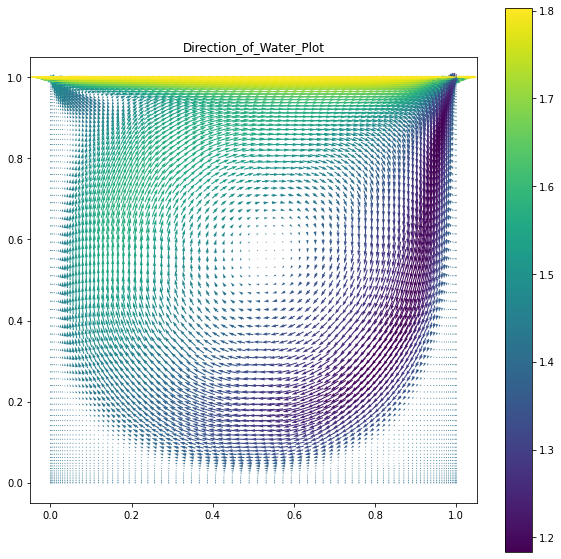

In [63]:
cmap = plt.cm.jet
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

fig, ax = plt.subplots(figsize=(10,10))


n = -2
color_array = np.sqrt(((data[4]-n)/2)**2 + ((data[3]-n)/2)**2)


plot = ax.quiver(data[0],data[1],data[3],data[4],color_array ,pivot='mid' , scale = 10 )
ax.set_title('Direction_of_Water_Plot')
ax.set_aspect('equal')
ax.use_sticky_edges = False
#cax = fig.add_axes([0.75,0.075,0.07,0.85])
#color_base = mpl.colorbar.ColorbarBase(cax,cmap = cmap)
plt.colorbar(plot)

In [50]:
plt.savefig('water.png')

<Figure size 432x288 with 0 Axes>

In [54]:
plt.savefig('water25.png')

<Figure size 432x288 with 0 Axes>

In [52]:
# cmap = plt.cm.jet
# cNorm  = colors.Normalize(vmin=0, vmax=1)
# scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)


# fig, ax = plt.subplots(figsize=(10,10))
# l4 = []
# for i in range (data.shape[0]):
#     vel = np.hypot(data[3][i],data[4][i])
#     if(vel <0.20):                     
#         ax.quiver(data[0][i],data[1][i],data[3][i],data[4][i],pivot='mid',color='blue', scale=35)
#     elif(vel >=0.20 and vel < 0.40):
#         ax.quiver(data[0][i],data[1][i],data[3][i],data[4][i],pivot='mid',color='red' , scale=30)
#     elif(vel >=0.40 and vel < 0.60):
#         ax.quiver(data[0][i],data[1][i],data[3][i],data[4][i],pivot='mid',color='black' , scale=25)
#     elif(vel >=0.60 and vel < 0.80):
#         ax.quiver(data[0][i],data[1][i],data[3][i],data[4][i],pivot='mid',color='green' , scale=20)
#     else : 
#         ax.quiver(data[0][i],data[1][i],data[3][i],data[4][i],pivot='mid',color='yellow' , scale=15)

# ax.quiver(data[0][1],data[1][1],data[3][1],data[4][1],pivot='mid',color='blue', scale=10)        
# ax.set_title('Direction_of_Water_Plot')
# ax.set_aspect('equal')
# ax.use_sticky_edges = False
# ax.set_aspect('equal')
# #print('Done showing the data')
# #cmap = mpl.colors.ListedColormap(['blue','black','gray'])
# #cax = fig.add_axes([0.75,0.075,0.07,0.85])
# #color_base = mpl.colorbar.ColorbarBase(cax,cmap = cmap,orientation = 'vertical')
# #color_base.set_ticks([0.2,0.6,0.9])
# #color_base.set_ticklabels(['Low', 'Medium', 'High']) 
# #color_base.set_label('Velocity')
# #plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
# #plt.colorbar(quiver)
# plt.tight_layout()


In [30]:
u

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
        -0.        ],
       [ 0.2       ,  0.19601332,  0.1842122 ,  0.16506712,  0.13934134,
         0.10806046,  0.07247155,  0.03399343, -0.0058399 , -0.04544042,
        -0.08322937],
       [ 0.4       ,  0.39202663,  0.3684244 ,  0.33013425,  0.27868268,
         0.21612092,  0.1449431 ,  0.06798686, -0.01167981, -0.09088084,
        -0.16645873],
       [ 0.6       ,  0.58803995,  0.5526366 ,  0.49520137,  0.41802403,
         0.32418138,  0.21741465,  0.10198029, -0.01751971, -0.13632126,
        -0.2496881 ],
       [ 0.8       ,  0.78405326,  0.7368488 ,  0.66026849,  0.55736537,
         0.43224184,  0.2898862 ,  0.13597371, -0.02335962, -0.18176168,
        -0.33291747],
       [ 1.        ,  0.98006658,  0.92106099,  0.82533561,  0.69670671,
         0.54030231,  0.36235775,  0.16996714, -0.02919952, -0.22720209,
        -0.416

In [31]:
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [33]:
#plt.savefig('water.png')

<Figure size 432x288 with 0 Axes>

In [80]:
dx = data[3]

In [81]:
dy = data[4]

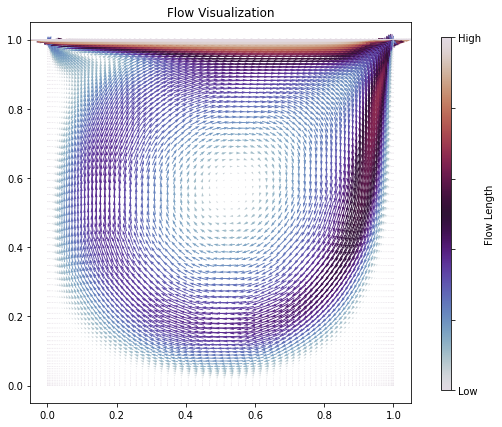

In [165]:
cmap = plt.cm.twilight
cNorm  = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)


length = np.hypot(dx , dy)


colorVal = scalarMap.to_rgba(length)
fig, ax = plt.subplots(figsize=(7,7))
flow = ax.quiver(data[0],data[1],data[3],data[4],color = colorVal ,pivot='mid' , scale = 8  )
ax.set_title('Flow Visualization')
ax.set_aspect('equal')
ax.use_sticky_edges = False


#https://stackoverflow.com/questions/25505674/python-matplotlib-add-colorbar
#https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib
cax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=cNorm)
cax.set_yticklabels(['Low', '','', '', '','High'])
cb.set_label('Flow Length')